# Hipótesis

Se pretende analizar un set de datos con informacion de los partidos jugados en todos los torneos ATP desde 1968.

Se explora el dataset en busca de patrones que nos ayuden a identificar que realacion hay entre los atributos de los jugadores (como la edad, altura, mano, etc.) que influyan en el resultado de juego.

Luego se intentará entrenar un modelo que nos ayude a predecir a partir de determinados atributos de los jugadores de un partido quien ganará.

Se leen los datos desde el dataset y se cargan en un dataframe.

In [152]:
import pandas as pd
# Leemos dataset (archivo csv) con la libreria Pandas y mediante url .

url = 'https://madein.com.uy/data/atp_matches_till_2022.csv'
df = pd.read_csv(url, sep=',', header=0) # Por defecto header = 0 pero aquí lo cambie ¿Qué pasará?


#Exploracion de los datos.

In [153]:
df.shape

(188161, 49)

In [154]:
# Observamos los primeros 5 registros
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188161 entries, 0 to 188160
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          188161 non-null  object 
 1   tourney_name        188161 non-null  object 
 2   surface             185844 non-null  object 
 3   draw_size           188161 non-null  int64  
 4   tourney_level       188161 non-null  object 
 5   tourney_date        188161 non-null  int64  
 6   match_num           188161 non-null  int64  
 7   winner_id           188161 non-null  int64  
 8   winner_seed         69694 non-null   float64
 9   winner_entry        16270 non-null   object 
 10  winner_name         188161 non-null  object 
 11  winner_hand         188144 non-null  object 
 12  winner_ht           171924 non-null  float64
 13  winner_ioc          188151 non-null  object 
 14  winner_age          186826 non-null  float64
 15  loser_id            188161 non-nul

Descripcion de los campos del dataset:
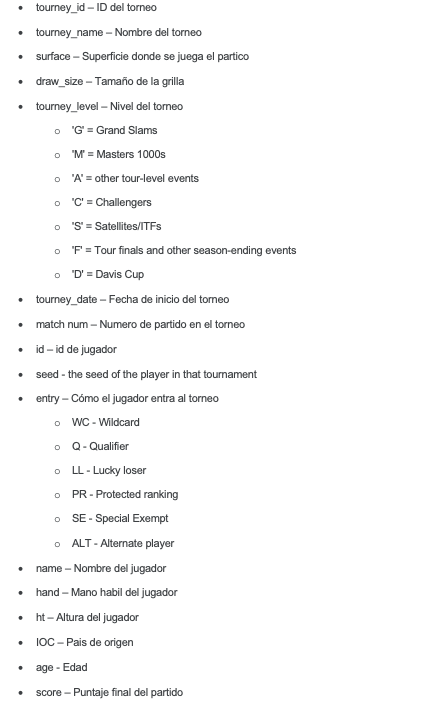

#Manipulacion de datos


In [156]:
# obtener listado con todas las columnas y para cada una si tiene al menos la
# mitad de registros vacios.
df.isnull().sum()>94980

,0
tourney_id,False
tourney_name,False
surface,False
draw_size,False
tourney_level,False
tourney_date,False
match_num,False
winner_id,False
winner_seed,True
winner_entry,True


In [157]:
#Quitar las columnas que estan vacias en al menos la mitad de los registros

df = df.drop('winner_seed', axis=1)
df = df.drop('winner_entry', axis=1)
df = df.drop('loser_seed', axis=1)
df = df.drop('loser_entry', axis=1)
df = df.drop('minutes', axis=1)
df = df.drop('w_ace', axis=1)
df = df.drop('w_df', axis=1)
df = df.drop('w_svpt', axis=1)
df = df.drop('w_1stIn', axis=1)
df = df.drop('w_1stWon', axis=1)
df = df.drop('w_2ndWon', axis=1)
df = df.drop('w_SvGms', axis=1)
df = df.drop('w_bpSaved', axis=1)
df = df.drop('w_bpFaced', axis=1)

df = df.drop('l_svpt', axis=1)
df = df.drop('l_df', axis=1)
df = df.drop('l_1stIn', axis=1)
df = df.drop('l_1stWon', axis=1)
df = df.drop('l_2ndWon', axis=1)
df = df.drop('l_SvGms', axis=1)
df = df.drop('l_bpSaved', axis=1)
df = df.drop('l_bpFaced', axis=1)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188161 entries, 0 to 188160
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          188161 non-null  object 
 1   tourney_name        188161 non-null  object 
 2   surface             185844 non-null  object 
 3   draw_size           188161 non-null  int64  
 4   tourney_level       188161 non-null  object 
 5   tourney_date        188161 non-null  int64  
 6   match_num           188161 non-null  int64  
 7   winner_id           188161 non-null  int64  
 8   winner_name         188161 non-null  object 
 9   winner_hand         188144 non-null  object 
 10  winner_ht           171924 non-null  float64
 11  winner_ioc          188151 non-null  object 
 12  winner_age          186826 non-null  float64
 13  loser_id            188161 non-null  int64  
 14  loser_name          188161 non-null  object 
 15  loser_hand          188097 non-nul

In [159]:
#Que columnas nos quedan con registros vacios?
df.isnull().sum()

,0
tourney_id,0
tourney_name,0
surface,2317
draw_size,0
tourney_level,0
tourney_date,0
match_num,0
winner_id,0
winner_name,0
winner_hand,17


In [160]:
#Reemplazar todos los registros vacios de la columna surface por "Entry"
df['surface'] = df['surface'].fillna('emptry')

In [161]:
#obtener los totales por el cambo surface
df['surface'].value_counts()

,count
surface,
Hard,74810
Clay,67428
Grass,22841
Carpet,20765
emptry,2317


In [162]:
#llenar los campos altura y edad que esten vacios con el promedio correspondiente.
df['winner_ht'] = df['winner_ht'].fillna(df['winner_ht'].mean())
df['loser_ht'] = df['winner_ht'].fillna(df['loser_ht'].mean())
df['winner_age'] = df['winner_age'].fillna(df['winner_age'].mean())
df['loser_age'] = df['loser_age'].fillna(df['loser_age'].mean())

#Convertir el campo age a int
df['winner_age'] = df['winner_age'].astype(int)
df['loser_age'] = df['loser_age'].astype(int)

In [163]:
#Generamos una nueva columna que sea la diferencia entre la columna winner_age y loser_age
df['age_diff'] = df['winner_age'] - df['loser_age']
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,loser_age,score,best_of,round,l_ace,winner_rank,winner_rank_points,loser_rank,loser_rank_points,age_diff
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,Douglas Smith,U,...,24,6-1 7-5,3,R32,NaN,NaN,NaN,NaN,NaN,1
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,Louis Pretorius,R,...,25,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,0
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,Cecil Pedlow,U,...,25,6-2 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,0
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,Tom Okker,R,...,25,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,-1
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,Armistead Neely,R,...,25,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188156,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,4,209362,Aristotelis Thanos,R,...,20,6-4 6-4,3,RR,1.0,1103.0,9.0,1130.0,8.0,0
188157,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,5,202065,Petros Tsitsipas,U,...,28,4-6 6-4 6-4,3,RR,1.0,808.0,23.0,1390.0,4.0,-7
188158,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,1,138846,Hong Kit Jack Wong,R,...,33,1-6 6-4 4-1 RET,3,RR,0.0,1059.0,10.0,1881.0,1.0,-10
188159,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,2,209409,Coleman Wong,R,...,21,6-4 6-4,3,RR,1.0,NaN,NaN,NaN,NaN,-4


Visualizacion de datos

In [164]:
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0.5, 0, 'Tipo de superficie')

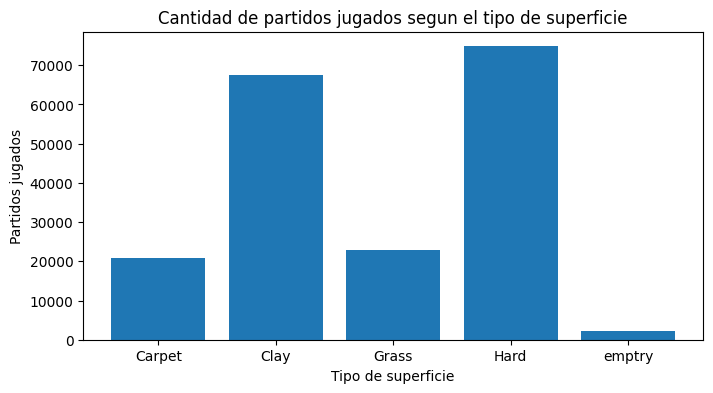

In [165]:
# Preparamos los datos para visualizar .
surfaces = df.groupby('surface')['surface'].count()

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(surfaces.index, surfaces)

# personalizamos
ax.set_title('Cantidad de partidos jugados segun el tipo de superficie')
ax.set_ylabel('Partidos jugados')
ax.set_xlabel('Tipo de superficie')

Text(0.5, 0, 'Edad')

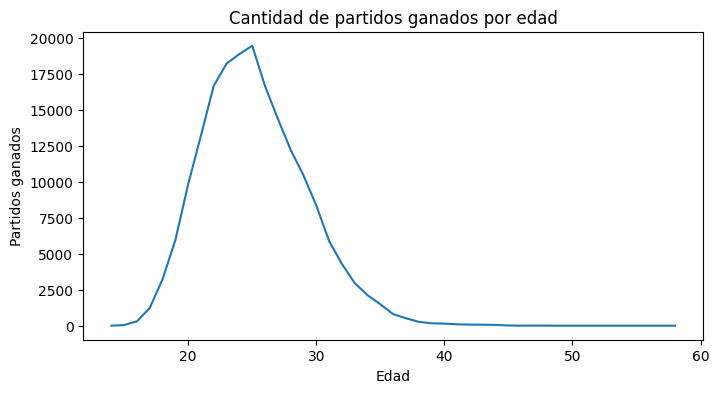

In [166]:
# Preparamos los datos para visualizar .
#xx = df.groupby('surface')['surface']
winner_age = df.groupby('winner_age')['winner_age'].count()


fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(winner_age.index, winner_age)

# personalizamos
ax1.set_title('Cantidad de partidos ganados por edad')
ax1.set_ylabel('Partidos ganados')
ax1.set_xlabel('Edad')

Text(0.5, 0, 'Mano')

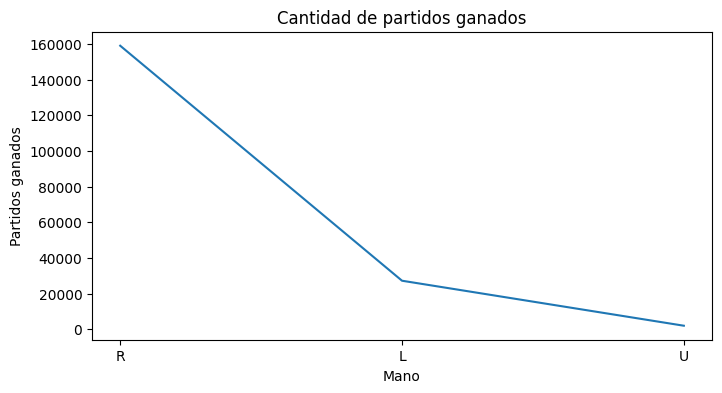

In [167]:
#Obtener la cantidad de registros por el campo winner_hand
winner_hand = df['winner_hand'].value_counts()

#Preparamos los datos para visualizar .
fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(winner_hand.index, winner_hand)

# personalizamos
ax1.set_title('Cantidad de partidos ganados')
ax1.set_ylabel('Partidos ganados')
ax1.set_xlabel('Mano')


In [168]:
# Obtener los registros del daraframe df que la columna surface es igual a la
# palabra Carpet

#df_carpet = df[df['surface']=='Carpet']
#df_clay = df[df['surface']=='Clay']
#df_entry = df[df['surface']=='Entry']
##df_grass = df[df['surface']=='Grass']
#df_hard = df[df['surface']=='Hard']

#Agrupar df por winner_rank
winner_rank = df.groupby('winner_rank')['winner_rank'].count()

#Obtener todos los registros para winner_rank = 1
df_winner_rank_1 = df[df['winner_rank']<6 ]

#Contar los registros agrupados por winner_rank
winner_rank = df_winner_rank_1.groupby('winner_rank')['winner_rank'].count()
winner_rank

#f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
#sns.scatterplot(data=df_winner_rank_1, x="winner_rank", y="winner_rank", hue="winner_hand", ax=axs[0])
#sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
#f.tight_layout()

#Generar barplot con x=winner_rank y=total de registros
#fig1, ax1 = plt.subplots(figsize=(8,4))
#ax1.bar(df_winner_rank_1.index, df_winner_rank_1)




#sns.barplot(data=df_winner_rank_1, x="winner_rank", y="count")

#df_winner_rank_1
#Agrupar df por winner_rank y winner_hand
#winner_rank_hand = df_winner_rank_1.groupby(['winner_rank', 'winner_hand'])['winner_rank'].count()
#winner_rank_hand

#Convertir winner_rank_hand en un dataframe
#df_winner_rank_hand = pd.DataFrame({'winner_rank':winner_rank_hand.index,'winner_hand':winner_rank_hand['winner_hand'], 'count':winner_rank_hand.values})
#df_winner_rank_hand

#df_winner_rank_hand = pd.DataFrame({'winner_rank':winner_rank_hand.index,'count':winner_rank_hand.values})
#df_winner_rank_hand

#winner_rank = df.groupby('winner_rank')['winner_points']['winner_rank'].count()
#winner_rank


,winner_rank
winner_rank,
1.0,3139
2.0,2996
3.0,2861
4.0,2507
5.0,2459


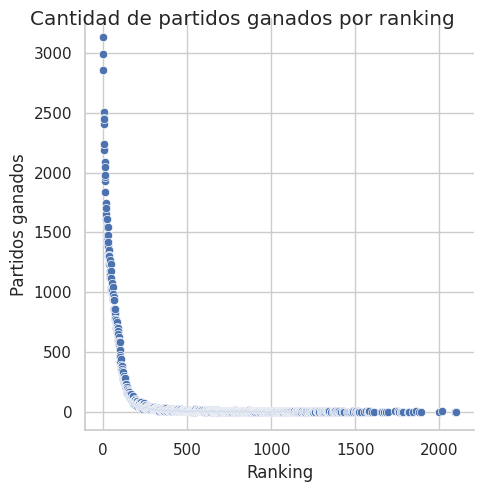

In [169]:

import seaborn as sns
sns.set_theme(style="whitegrid")


#f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))

# Preparamos los datos para visualizar .




winner_rank = df.groupby('winner_rank')['winner_rank'].count()
#winner_rank
#convertir la serie en un dataframe
df_winner_rank = pd.DataFrame({'rank':winner_rank.index, 'count':winner_rank.values})
df_winner_rank
#surfaces = df.groupby('surface')['surface'].count()

#sns.barplot(data=df_winner_rank, x="rank", y="count")


#sns.scatterplot(data=df_winner_rank, x="rank", y="count", hue="winner_hand", ax=axs[0])

#f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
#sns.scatterplot(data=df_winner_rank, x="rank", y="count", ax=axs[0])
#f.tight_layout()

g = sns.relplot(data=df_winner_rank, x="rank", y="count")
g.fig.suptitle('Cantidad de partidos ganados por ranking')
g.set(xlabel='Ranking', ylabel='Partidos ganados')
# Axis-level
#ax = sns.barplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='hand', ylabel='count'>

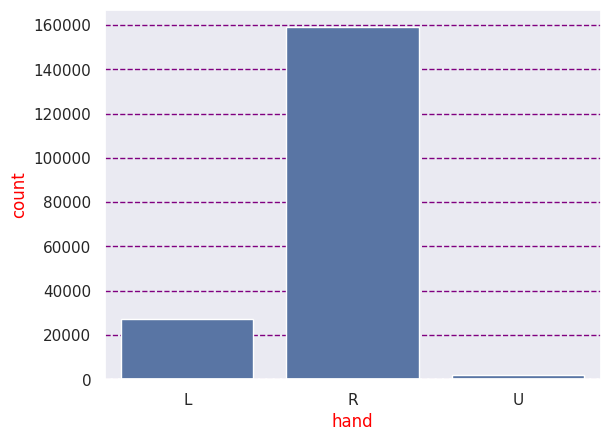

In [170]:



winner_hand = df.groupby('winner_hand')['winner_hand'].count()

df_winner_hand = pd.DataFrame({'hand':winner_hand.index, 'count':winner_hand.values})


sns.set_style(style="darkgrid", rc={"grid.color": ".6"})
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlelocation": "left"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "red"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})


sns.barplot(data=df_winner_hand, x="hand", y="count")


[Text(0.5, 0, 'Cantidad de sets'),
 Text(0, 0.5, 'Cantidad de partidos'),
 Text(0.5, 1.0, 'Cantidad de partidos jugados a # de sets')]

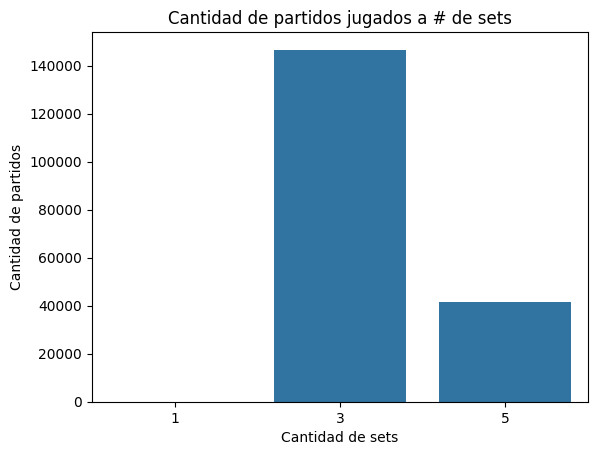

In [171]:
best_of = df.groupby('best_of')['best_of'].count()

df_best_of = pd.DataFrame({'best_of':best_of.index, 'count':best_of.values})

sns.reset_orig()

ax = sns.barplot(data=df_best_of, x="best_of", y="count")
ax.set(xlabel='Cantidad de sets', ylabel='Cantidad de partidos', title='Cantidad de partidos jugados a # de sets')

# Conclusion

Se observan algunos patrones que pueden identificar alguna relacion entre ganar y tener determinados atributos, particularmente se nota que en la mayoría de los partidos el jugador que gana el encuentro tiene aproximadamente 25 años.

También se observan datos que a cuanto mejor ranking es mayor la cantidad de partidos que se ganan.

Se observa que la mayoría de los jugadores son derechos y la mayor cantidad de partidos se juegan en canchas con superficie dura.